<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%2012/Modern%20CNN/VGG/Tugas_Lecture_12_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochamad Phillia Wibowo

NIM : 1103204191

Kelas : Machine Learning (TK-44-G04)

Tugas 12 MODERN CNN (VGG)

# Mengunduh Dataset

In [1]:
import os  # Mengimpor modul os untuk operasi sistem
import sys  # Mengimpor modul sys untuk operasi sistem
from tempfile import NamedTemporaryFile  # Mengimpor NamedTemporaryFile dari modul tempfile
from urllib.request import urlopen  # Mengimpor urlopen dari modul urllib.request
from urllib.parse import unquote, urlparse  # Mengimpor unquote dan urlparse dari modul urllib.parse
from urllib.error import HTTPError  # Mengimpor HTTPError dari modul urllib.error
from zipfile import ZipFile  # Mengimpor ZipFile dari modul zipfile
import tarfile  # Mengimpor modul tarfile
import shutil  # Mengimpor modul shutil untuk operasi file

CHUNK_SIZE = 40960  # Ukuran chunk untuk proses download
DATA_SOURCE_MAPPING = 'cat-and-dog:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F23777%2F30378%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240606%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240606T163517Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4cd72e9c0346d955101afb0f5481feee279bf21ea97392d65090c54de9a524651aa875c5a1af2f0419aea981a15ec68e90a96fbb152f1c41ff977b19f1c7bc59356c92f7eafb04d09c4176a2731e3a6f56a04b3a36fad8bf7d2ba70f81ed3ce81cf557394c5ee10c06f39047c1c1d5273201109e2cd00cdde9694459b885072befb6eeaebea9438a7aabaaa2c7b27c2c7d5aec1d108f1b0fcd663043d6b492a935ef64ad2b659aa2a107cfa78372af19036f4e73100d603656989d1db07b24a6fdb51704ebefa77f37b21b6d7124a6f5a7e166029ce24acc9dfa89d564c3dee3790442db19c3204c77f319dc54bb82eac6f6c9307bfbf032e9b5ff936f449c90'

KAGGLE_INPUT_PATH='/kaggle/input'  # Path untuk data masukan Kaggle
KAGGLE_WORKING_PATH='/kaggle/working'  # Path untuk direktori kerja Kaggle
KAGGLE_SYMLINK='kaggle'  # Nama symlink Kaggle

!umount /kaggle/input/ 2> /dev/null  # Unmount jika sebelumnya terpasang
shutil.rmtree('/kaggle/input', ignore_errors=True)  # Hapus direktori input Kaggle jika ada, abaikan kesalahan jika tidak ada
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)  # Buat direktori input Kaggle jika tidak ada
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)  # Buat direktori kerja Kaggle jika tidak ada

# Coba membuat symlink untuk input dan working directory Kaggle
try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

# Loop untuk setiap pasangan sumber data dan URL-nya dalam DATA_SOURCE_MAPPING
for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Gagal memuat (mungkin sudah kadaluarsa) {download_url} ke path {destination_path}')
        continue
    except OSError as e:
        print(f'Gagal memuat {download_url} ke path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 228487605 bytes downloaded
Downloaded and uncompressed: cat-and-dog
Data source import complete.


In [2]:
# Lingkungan Python 3 ini dilengkapi dengan banyak perpustakaan analisis yang berguna terpasang
# Ini didefinisikan oleh gambar Docker kaggle/python: https://github.com/kaggle/docker-python
# Sebagai contoh, berikut beberapa paket yang membantu untuk dimuat

import numpy as np # aljabar linear
import pandas as pd # pemrosesan data, I/O file CSV (mis. pd.read_csv)

# Data masukan tersedia dalam direktori "/kaggle/input/" yang hanya bisa dibaca
# Sebagai contoh, menjalankan ini (dengan mengklik jalankan atau menekan Shift+Enter) akan menampilkan semua file di bawah direktori masukan

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Anda dapat menulis hingga 5GB ke direktori saat ini (/kaggle/working/) yang akan dipertahankan sebagai output ketika Anda membuat versi menggunakan "Simpan & Jalankan Semua"
# Anda juga dapat menulis file sementara

Output streaming akan dipotong hingga 5000 baris terakhir.
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2184.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3410.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3929.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2495.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3459.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3862.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2220.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2631.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2653.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2090.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3566.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1192.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2958.jpg
/kaggle/input/cat-and-dog/train

## VGG16 dan ImageNet

In [3]:
import numpy as np  # Mengimpor modul numpy
import tensorflow as tf  # Mengimpor modul tensorflow
from tensorflow import keras  # Mengimpor modul keras dari tensorflow
from tensorflow.keras.models import Sequential  # Mengimpor Sequential model dari modul keras
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D  # Mengimpor lapisan-lapisan yang umum digunakan dari modul keras
from tensorflow.keras.optimizers import Adam  # Mengimpor optimizer Adam dari modul keras
from tensorflow.keras.metrics import categorical_crossentropy  # Mengimpor fungsi categorical_crossentropy dari modul keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Mengimpor ImageDataGenerator dari modul keras untuk augmentasi gambar
from sklearn.metrics import confusion_matrix  # Mengimpor confusion_matrix dari modul sklearn.metrics
from sklearn.model_selection import KFold  # Mengimpor KFold dari modul sklearn.model_selection
import itertools  # Mengimpor itertools untuk operasi iterasi
import os  # Mengimpor modul os untuk operasi sistem
import shutil  # Mengimpor modul shutil untuk operasi file
import random  # Mengimpor modul random untuk operasi acak
import glob  # Mengimpor modul glob untuk pencarian pola file
import matplotlib.pyplot as plt  # Mengimpor modul matplotlib.pyplot untuk plotting
import warnings  # Mengimpor modul warnings untuk mengabaikan peringatan
warnings.simplefilter(action='ignore', category=FutureWarning)  # Mengabaikan peringatan FutureWarning
%matplotlib inline  # Memastikan plotting dilakukan dalam notebook

In [4]:
train_path = '/kaggle/input/cat-and-dog/training_set/training_set'  # Path untuk data latih
  # Path untuk data validasi (tidak digunakan)
test_path = '../input/cat-and-dog/test_set/test_set'  # Path untuk data uji

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)  # Membuat generator batch untuk data latih
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)  # Membuat generator batch untuk data uji

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)  # Mengambil satu batch gambar dan label dari data latih

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))  # Membuat subplot dengan ukuran 1x10
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):  # Iterasi melalui gambar dan sumbu
        ax.imshow(img)  # Menampilkan gambar pada sumbu
        ax.axis('off')  # Menonaktifkan sumbu
    plt.tight_layout()  # Menata subplot agar sesuai
    plt.show()  # Menampilkan gambar

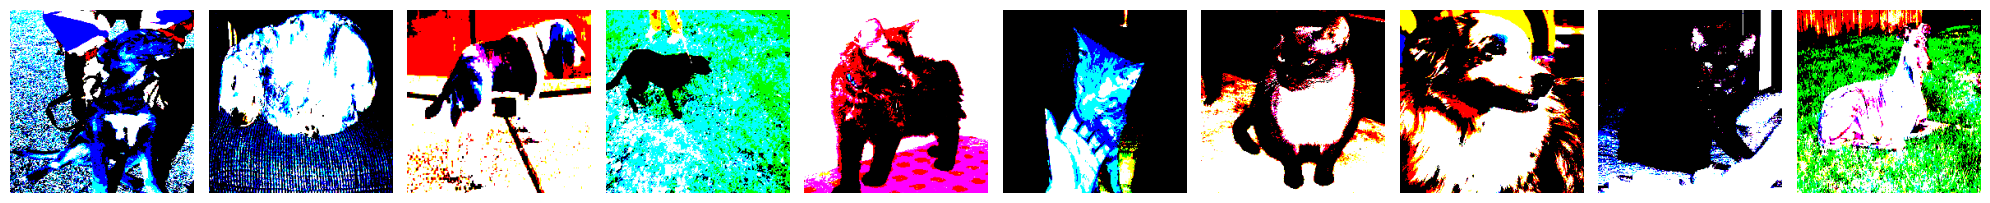

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [7]:
plotImages(imgs)  # Memanggil fungsi plotImages untuk menampilkan gambar
print(labels) # Mencetak labels

# Part-1 Membuat Tuned Model

In [8]:
vgg16_model = tf.keras.applications.vgg16.VGG16()  # Menginisialisasi model VGG16

553467096/553467096 [==============================] - 2s 0us/step


In [9]:
vgg16_model.summary()  # Menampilkan ringkasan dari model VGG16

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
type(vgg16_model)  # Menampilkan tipe dari model VGG16

keras.src.engine.functional.Functional

In [11]:
model = Sequential()  # Membuat model Sequential baru

for layer in vgg16_model.layers[:-1]:  # Iterasi melalui semua lapisan kecuali yang terakhir
    model.add(layer)  # Menambahkan setiap lapisan ke model Sequential baru

In [12]:
for layer in model.layers:
    layer.trainable = False  # Menetapkan atribut trainable dari setiap lapisan menjadi False, sehingga bobotnya tidak akan diperbarui selama pelatihan

In [13]:
model.add(Dense(units=2, activation='softmax'))  # Menambahkan lapisan Dense terakhir dengan 2 unit dan fungsi aktivasi softmax

In [14]:
model.summary()  # Menampilkan ringkasan dari model yang telah dimodifikasi

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

# Part - 2

### Melatih A Fine-Tuned Neural Network dengan TensorFlow's Keras API

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])  # Mengompilasi model dengan optimizer Adam, fungsi kerugian categorical crossentropy, dan metrik akurasi

In [16]:
model.fit(x=train_batches,  # Data latih
          steps_per_epoch=len(train_batches),  # Langkah per epoch
          epochs=5,  # Jumlah epoch
          verbose=2  # Level keberagaman keluaran yang ditampilkan selama pelatihan (0: silent, 1: progress bar, 2: one line per epoch)
         )  # Melatih model

Epoch 1/5
801/801 - 51s - loss: 0.0951 - accuracy: 0.9629 - 51s/epoch - 64ms/step
Epoch 2/5
801/801 - 45s - loss: 0.0407 - accuracy: 0.9856 - 45s/epoch - 56ms/step
Epoch 3/5
801/801 - 45s - loss: 0.0316 - accuracy: 0.9878 - 45s/epoch - 57ms/step
Epoch 4/5
801/801 - 45s - loss: 0.0249 - accuracy: 0.9915 - 45s/epoch - 56ms/step
Epoch 5/5
801/801 - 45s - loss: 0.0192 - accuracy: 0.9941 - 45s/epoch - 56ms/step


# Part-3 Predict

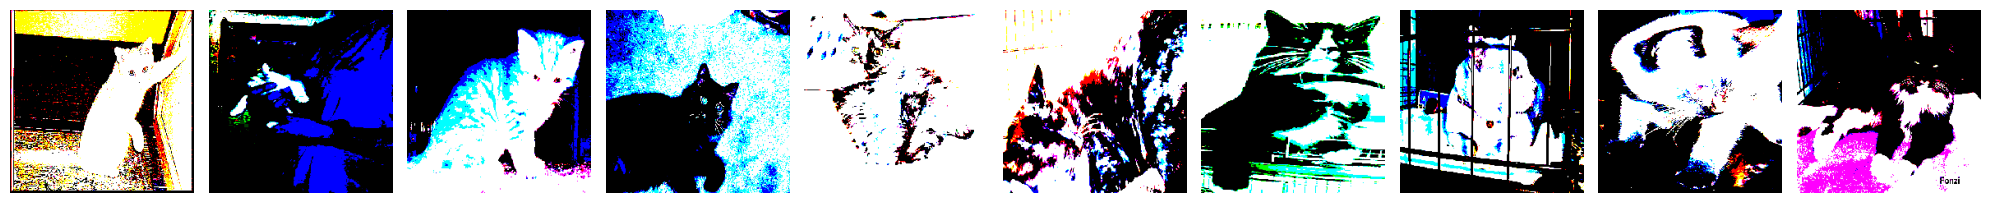

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [17]:
test_imgs, test_labels = next(test_batches)  # Mengambil satu batch gambar dan label dari data uji
plotImages(test_imgs)  # Menampilkan gambar-gambar dari batch uji
print(test_labels)  # Menampilkan label dari batch uji

In [18]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)  # Membuat prediksi menggunakan model pada data uji

#### Plot Prediksi dan Confusion Matrix

In [20]:
test_batches.class_indices  # Menampilkan indeks kelas dari generator batch data uji

{'cats': 0, 'dogs': 1}

Confusion matrix, without normalization
[[994  17]
 [ 22 990]]


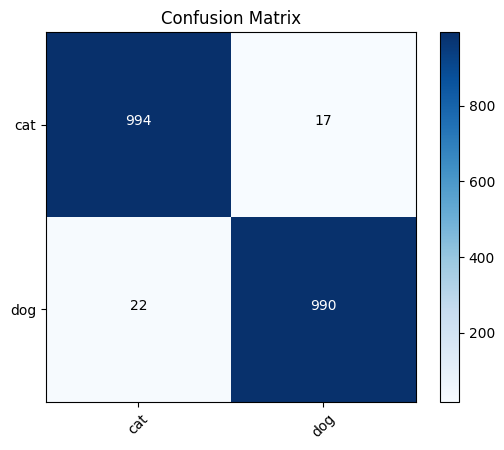

In [21]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))  # Menghitung confusion matrix
cm_plot_labels = ['cat', 'dog']  # Label untuk plotting confusion matrix
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')  # Memplot confusion matrix